In [240]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [260]:
training_set=pd.read_csv('Google_Stock_Price_Train.csv')
training_set

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [261]:
training_set['Close'] = pd.to_numeric(training_set['Close'].str.replace(',', ''))

In [262]:
training_set = training_set.iloc[:,4:5].values

In [244]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() 

In [263]:
training_set = sc.fit_transform(training_set)

In [264]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [265]:
X_train = np.reshape(X_train, (1257, 1, 1))

In [266]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [287]:
regressor = Sequential()
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (None, 1)))
regressor.add(Dense(units = 8, activation = 'relu'))
regressor.add(Dense(units = 4, activation = 'sigmoid'))
regressor.add(Dense(units = 1))


In [288]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, batch_size = 32, epochs = 40)

Epoch 1/40
40/40 [==============================] - 2s 3ms/step - loss: 0.0938
Epoch 2/40
40/40 [==============================] - 0s 3ms/step - loss: 0.0595
Epoch 3/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0516
Epoch 4/40
40/40 [==============================] - 0s 3ms/step - loss: 0.0493
Epoch 5/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 6/40
40/40 [==============================] - 0s 3ms/step - loss: 0.0435
Epoch 7/40
40/40 [==============================] - 0s 3ms/step - loss: 0.0389
Epoch 8/40
40/40 [==============================] - 0s 3ms/step - loss: 0.0328
Epoch 9/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0252
Epoch 10/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0171
Epoch 11/40
40/40 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 12/40
40/40 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 13/40
40/40 [==============================

In [289]:
test_set = pd.read_csv("Google_Stock_Price_Test.csv")


In [290]:
# test_set['Close']

In [291]:
real_stock_price = test_set.iloc[:,4:5].values

In [292]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 313ms/step


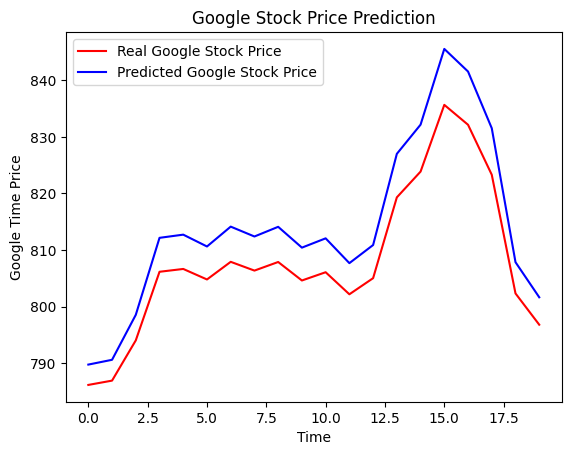

In [293]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

In [294]:
real_stock_price = pd.read_csv("Google_Stock_Price_Train.csv")
real_stock_price['Close'] = pd.to_numeric(real_stock_price['Close'].str.replace(',', ''))
real_stock_price = real_stock_price.iloc[:,4:5].values

real_stock_price

array([[663.59],
       [666.45],
       [657.21],
       ...,
       [785.05],
       [782.79],
       [771.82]])

In [295]:
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

40/40 [==============================] - 0s 3ms/step


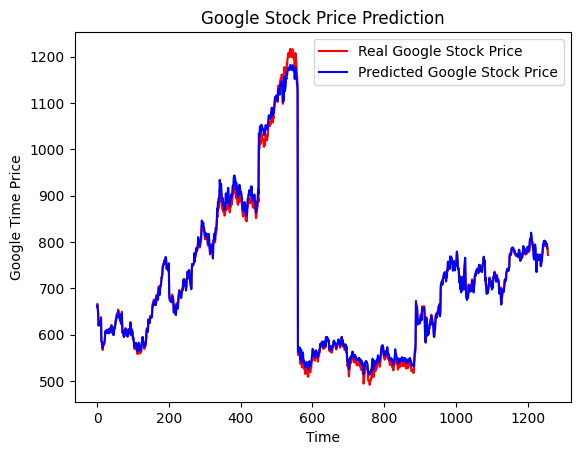

In [296]:
plt.plot(real_stock_price.tolist(), color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

In [277]:
predicted_stock_price_train

array([[659.99304],
       [662.9719 ],
       [653.3763 ],
       ...,
       [798.1424 ],
       [791.02356],
       [788.5472 ]], dtype=float32)